In [2]:
#encoding=utf-8
import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks as cf
from bokeh.charts import Bar, output_file, show
from bokeh.io import gridplot, output_file, show,output_notebook
from bokeh.sampledata.autompg import autompg as df
output_notebook()

Loading BokehJS ...

In [3]:
import pandas as pd
import numpy as np
from collections import OrderedDict
import seaborn as sns
import matplotlib.pyplot as plt
import re
get_ipython().magic(u'matplotlib inline')
sns.set_style('whitegrid') 

In [4]:
def title_mode(x):
    x = x.title()
    return x

In [5]:
def group_job(frame,column):
    df = column.to_frame()
    frame_merge = pd.concat([frame,df],axis = 1)
    return frame_merge

In [6]:
def code_filter(x,code_list,pattern_r,pattern_c):

    count = 0
    for each in code_list:
        if each in x:
            count += 1
    
    if len(re.findall(pattern_r,x))>0:
        count +=1
    
    if len(re.findall(pattern_c,x))>0:
        count +=1
        
    return count

In [7]:
def job_filter(x,job_list):
   
    count = 0
    for each in job_list:
        if each in x:
            count += 1
    return count

In [8]:
def code_recommend_dummy(column,code_list,pattern_r,pattern_c):
    code_data = []
    for i in column:
        temp = OrderedDict()
        for each in code_list: 
            if each in i:
                temp[each] = 1
            else:
                temp[each] = 0
                
        if len(re.findall(pattern_r,i))>0:
            temp['R'] = 1
        else:
            temp['R'] = 0
    
        if len(re.findall(pattern_c,i))>0:
            temp['C'] = 1
        else:
            temp['C'] = 0

        code_data.append(temp)
    
    code_frame = pd.DataFrame(code_data)
    return code_frame

In [9]:
def job_recommend_dummy(column,job_list):
    job_data = []
    for i in column:
        temp = OrderedDict()
        for j in job_list: 
            if j in i:
                temp[j] = 1
            else:
                temp[j] = 0
                
        job_data.append(temp)
        
    job_frame = pd.DataFrame(job_data)
    return job_frame

In [10]:
def frame_mean(frame):
    mean = frame.iloc[:].mean(axis=0)
    mean_frame = pd.DataFrame(mean)
    mean_frame.reset_index(inplace=True)
    mean_frame.columns=['variable','mean']
    mean_frame = mean_frame.sort_values(by='mean',ascending=False)
    return mean_frame

In [11]:
code_list = ['Python','SPSS','SAS','Hadoop','Spark','Oracle','SQL','Java','C++','Javascript','Matlab',
            'Linux','Hive','Spark','Unix','Tableau','Scala','Pig','MapReduce','Ruby','D3.js','MongoDB',
            'Git','Theano','Caffe','Spotfire','Torch','Excel','Sqoop']

# consider to use .title() or .lower()
#'Tensorflow','NoSQL','MySQL'

In [12]:
job_list = ['大數據','Crm','視覺化','巨量資料','顧客關係','演算法','機器學習','文字探勘','Nlp',
           '文本探勘','Text Mining','Machine Learning','Deep Learning','深度學習','人工智慧','Artificial Intelligence',
           '決策樹','Svm','A/B','推薦系統','Recommend','圖像','神經網絡','Pca','演算法','Neural Network','Social Network',
           '巨量資料','Bi','Big Data','視覺化','統計','Algorithm','平行運算','分散式運算','資料分析',
           '資料庫分析','數據分析','預測模型','資料採礦','資料探勘','Data Mining','建模',
           '行銷分析','商機分析','Ml','Dm','資料科學']

# '資料備援','資料倉儲','資料庫系統','資料庫架構','程式開發'

In [13]:
pattern_r = r'\b[R]\b[^#]'
pattern_c = r'\b[C]\b[^#]'

In [14]:
DATA_DIR = "C:/Users/GN1504301/Desktop/"
data = pd.read_csv(DATA_DIR + "m_0106.csv",encoding='utf-8')
data2 = pd.read_csv(DATA_DIR + "m_1028.csv",encoding='utf-8')
print('data lenth:',len(data))
print('data2 lenth:',len(data2))

data lenth: 2137
data2 lenth: 2525


In [15]:
data['others'] = data['others'].astype(str)
data['code_all'] = data['others'] + data['job_content'] + data['tools']
data['code_title_mode'] = data['code_all'].apply(title_mode)

data['code_dummy'] = data['code_all'].apply(lambda x:code_filter(x,code_list,pattern_r,pattern_c))
data['job_dummy'] = data['code_title_mode'].apply(lambda x:job_filter(x,job_list))

In [16]:
data_code = data[(data.code_dummy > 0)&(data.job_dummy > 0)]
data_code.reset_index(inplace=True)

In [17]:
print('new data lenth:',len(data_code),'diff:',len(data)-len(data_code))

new data lenth: 630 diff: 1507


In [18]:
code_frame = code_recommend_dummy(data_code['code_all'],code_list,pattern_r,pattern_c)
job_frame = job_recommend_dummy(data_code['code_title_mode'],job_list)

In [19]:
group_DM = ['Data Mining','資料探勘','資料採礦','Dm']
group_ML = ['Ml','Machine Learning','機器學習','決策樹','Svm']
group_DL = ['Neural Network','神經網絡','Deep Learning','深度學習','圖像']
group_text = ['文本探勘','文字探勘','Text Mining']

In [20]:
job_frame['dm_dummy'] = job_frame[group_DM].max(axis=1)
job_frame['ml_dummy'] = job_frame[group_ML].max(axis=1)
job_frame['dl_dummy'] = job_frame[group_DL].max(axis=1)
job_frame['text_dummy'] = job_frame[group_text].max(axis=1)

In [21]:
dm_job = group_job(code_frame,job_frame['dm_dummy'])
ml_job = group_job(code_frame,job_frame['ml_dummy'])
dl_job = group_job(code_frame,job_frame['dl_dummy'])
text_job = group_job(code_frame,job_frame['text_dummy'])

In [22]:
dm_mean = dm_job.groupby('dm_dummy').mean()
dm_mean.reset_index(inplace=True)

In [23]:
ml_mean = ml_job.groupby('ml_dummy').mean()
ml_mean.reset_index(inplace=True)

In [24]:
dl_mean = dl_job.groupby('dl_dummy').mean()
dl_mean.reset_index(inplace=True)

In [25]:
text_mean = text_job.groupby('text_dummy').mean()
text_mean.reset_index(inplace=True)

In [36]:
dm_mean.to_csv(DATA_DIR +'dm_mean.csv',encoding='utf-8',index=None)
dm_mean.head()

,dm_dummy,C,C++,Caffe,D3.js,Excel,Git,Hadoop,Hive,Java,...,SPSS,SQL,Scala,Spark,Spotfire,Sqoop,Tableau,Theano,Torch,Unix
0,0,0.099609,0.093750,0.001953,0.009766,0.482422,0.017578,0.066406,0.019531,0.222656,...,0.091797,0.375000,0.021484,0.039062,0.005859,0.001953,0.029297,0.001953,0.001953,0.013672
1,1,0.152542,0.135593,0.000000,0.008475,0.194915,0.050847,0.144068,0.067797,0.415254,...,0.279661,0.635593,0.033898,0.093220,0.008475,0.000000,0.050847,0.000000,0.000000,0.008475


In [37]:
ml_mean.to_csv(DATA_DIR +'ml_mean.csv',encoding='utf-8',index=None)
ml_mean.head()

,ml_dummy,C,C++,Caffe,D3.js,Excel,Git,Hadoop,Hive,Java,...,SPSS,SQL,Scala,Spark,Spotfire,Sqoop,Tableau,Theano,Torch,Unix
0,0,0.082418,0.075092,0.000000,0.009158,0.483516,0.021978,0.051282,0.012821,0.203297,...,0.124542,0.412088,0.009158,0.023810,0.007326,0.000000,0.032967,0.000000,0.000000,0.010989
1,1,0.285714,0.273810,0.011905,0.011905,0.071429,0.035714,0.273810,0.130952,0.619048,...,0.142857,0.500000,0.119048,0.214286,0.000000,0.011905,0.035714,0.011905,0.011905,0.023810


In [38]:
dl_mean.to_csv(DATA_DIR +'dl_mean.csv',encoding='utf-8',index=None)
dl_mean.head()

,dl_dummy,C,C++,Caffe,D3.js,Excel,Git,Hadoop,Hive,Java,...,SPSS,SQL,Scala,Spark,Spotfire,Sqoop,Tableau,Theano,Torch,Unix
0,0,0.104746,0.096563,0.000000,0.00982,0.438625,0.022913,0.072013,0.026187,0.248773,...,0.126023,0.423895,0.022913,0.040917,0.006547,0.000000,0.03437,0.000000,0.000000,0.011457
1,1,0.263158,0.263158,0.052632,0.00000,0.105263,0.052632,0.368421,0.105263,0.578947,...,0.157895,0.421053,0.052632,0.315789,0.000000,0.052632,0.00000,0.052632,0.052632,0.052632


In [39]:
text_mean.to_csv(DATA_DIR +'text_mean.csv',encoding='utf-8',index=None)
text_mean.head()

,text_dummy,C,C++,Caffe,D3.js,Excel,Git,Hadoop,Hive,Java,...,SPSS,SQL,Scala,Spark,Spotfire,Sqoop,Tableau,Theano,Torch,Unix
0,0,0.109299,0.099511,0.001631,0.009788,0.435563,0.021207,0.075041,0.024470,0.247961,...,0.119086,0.414356,0.021207,0.045677,0.006525,0.001631,0.032626,0.001631,0.001631,0.013051
1,1,0.117647,0.176471,0.000000,0.000000,0.176471,0.117647,0.294118,0.176471,0.647059,...,0.411765,0.764706,0.117647,0.176471,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000


In [30]:
code_mean = frame_mean(code_frame)
job_mean = frame_mean(job_frame)

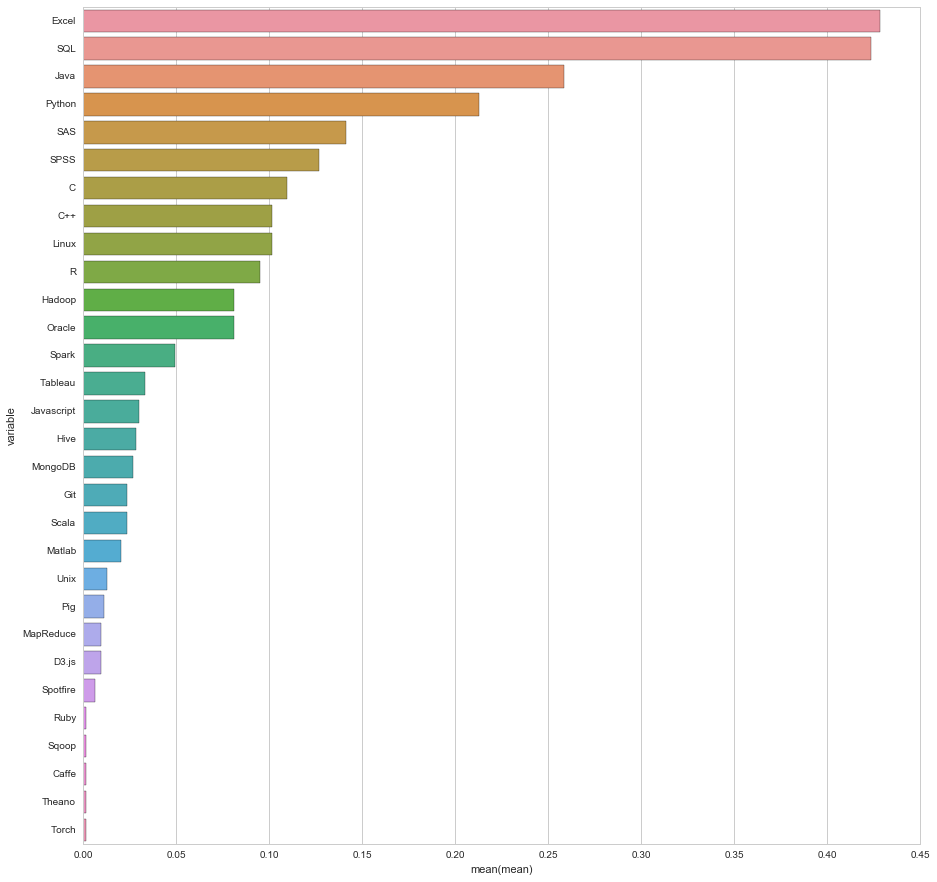

In [31]:
fig, ax = plt.subplots(figsize=(15,15)) 
ax = sns.barplot(x='mean',y='variable',data = code_mean)

In [173]:
job_mean.to_csv(DATA_DIR+'job_mean.csv',encoding='utf-8')

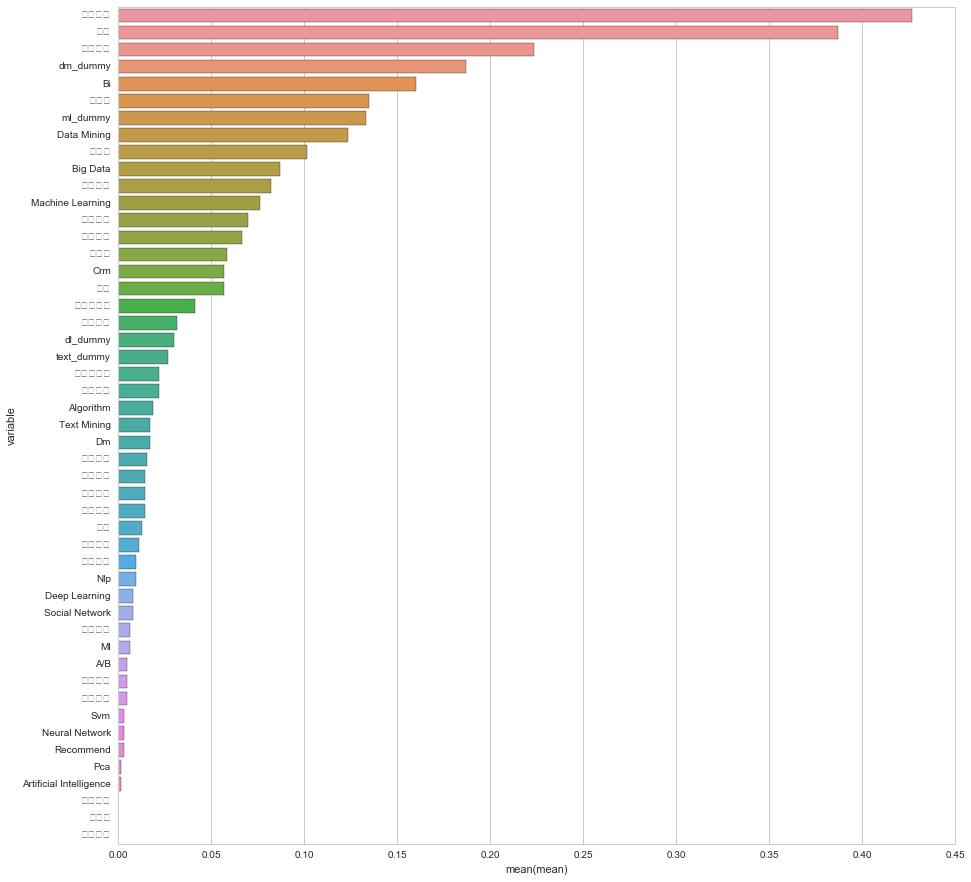

In [32]:
fig, ax = plt.subplots(figsize=(15,15))  
ax = sns.barplot(x='mean',y='variable',data = job_mean)

In [345]:
p = Bar(job_mean, 'variable', values='mean', title="Total MPG by CYL",legend=False,plot_width=2000, plot_height=300)
show(p)

In [33]:
code_corr = code_frame.corr()

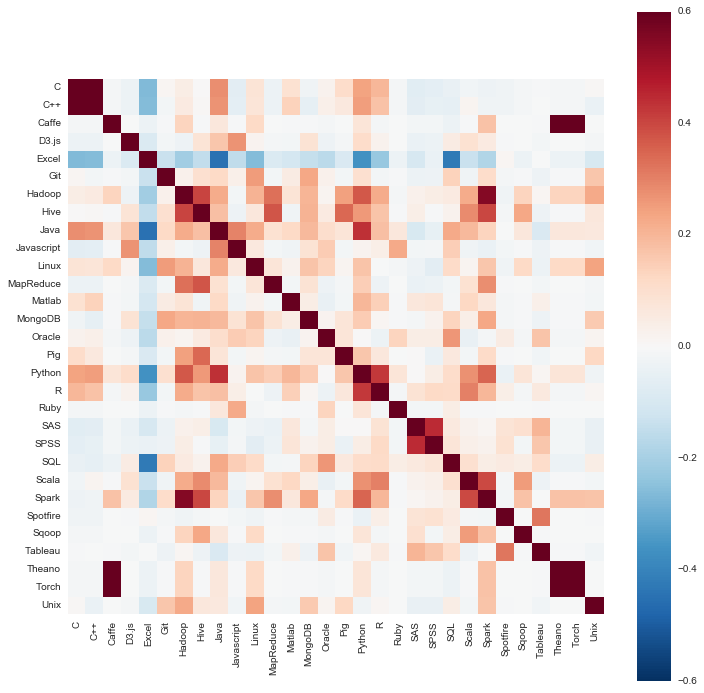

In [35]:
fig, ax = plt.subplots(figsize=(12,12))  
ax = sns.heatmap(code_corr, vmax=.6, square=True)

In [90]:
py.sign_in('jeff15388', 'XJU6HsE4uIE3KJcOPge0')

In [159]:
gragh = [go.Heatmap(z = code_corr.values.tolist())]
py.iplot(gragh)

In [23]:
code_corr.to_csv(DATA_DIR+'code_corr.csv',encoding='utf-8')

In [63]:
def degree_filter(x):
    if '博士' in x:
        return 'doctor'
    else:
        if '碩士' in x:
            return 'master'
        else:
            if '大學' in x:
                return 'college'
            else:
                return 'No limit'

In [76]:
data_code['degree_categorical'] = data_code['degree'].apply(degree_filter)

C:\Users\GN1504301\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [80]:
data_code.groupby('degree_categorical')['index'].count()

degree_categorical
No limit    175
college     312
doctor        8
master      456
Name: index, dtype: int64